#Data Loading and Exploration:

In [1]:
!pip install onnxmltools onnxconverter_common skl2onnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 329.0/329.0 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.4/298.4 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 30.2 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.17.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.20.2 which is incompatible.
tensorflow-metadata 1.15.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import model_selection,neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

#import joblib

import onnxmltools
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

Data Insight


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df = pd.read_csv('/content/drive/MyDrive/dataset_bg.csv')
df

,Station,Year,January,February,March,April,May,June,July,August,September,October,November,December,Annual,Flood
0,Dhaka,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,Dhaka,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,Dhaka,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,Dhaka,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,Dhaka,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,Dhaka,2016,3.0,285.0,55.0,65.0,328.0,949.0,1304.0,359.0,378.0,217.0,109.0,0.0,4052.0,YES
120,Dhaka,2017,0.0,0.0,119.0,419.0,239.0,1025.0,631.0,772.0,835.0,179.0,1.0,42.0,4262.0,YES
121,Dhaka,2018,18.0,0.0,0.0,246.0,279.0,250.0,1313.0,454.0,170.0,218.0,0.0,3.0,2951.0,NO
122,Dhaka,2019,0.0,35.0,20.0,222.0,286.0,576.0,1114.0,424.0,333.0,170.0,114.0,14.0,3308.0,YES


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Station    124 non-null    object 
 1   Year       124 non-null    int64  
 2   January    124 non-null    float64
 3   February   124 non-null    float64
 4   March      124 non-null    float64
 5   April      124 non-null    float64
 6   May        124 non-null    float64
 7   June       124 non-null    float64
 8   July       124 non-null    float64
 9   August     124 non-null    float64
 10  September  124 non-null    float64
 11  October    124 non-null    float64
 12  November   124 non-null    float64
 13  December   124 non-null    float64
 14  Annual     124 non-null    float64
 15  Flood      124 non-null    object 
dtypes: float64(13), int64(1), object(2)
memory usage: 15.6+ KB


In [8]:
df.apply(lambda x:sum(x.isnull()), axis=0)

,0
Station,0
Year,0
January,0
February,0
March,0
April,0
May,0
June,0
July,0
August,0


#Data Preprocessing:

In [9]:
df['Flood'].replace(['YES','NO'],[1,0],inplace=True)
df.head()

,Station,Year,January,February,March,April,May,June,July,August,September,October,November,December,Annual,Flood
0,Dhaka,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,1
1,Dhaka,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,1
2,Dhaka,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,1
3,Dhaka,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,1
4,Dhaka,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,0


<Axes: >

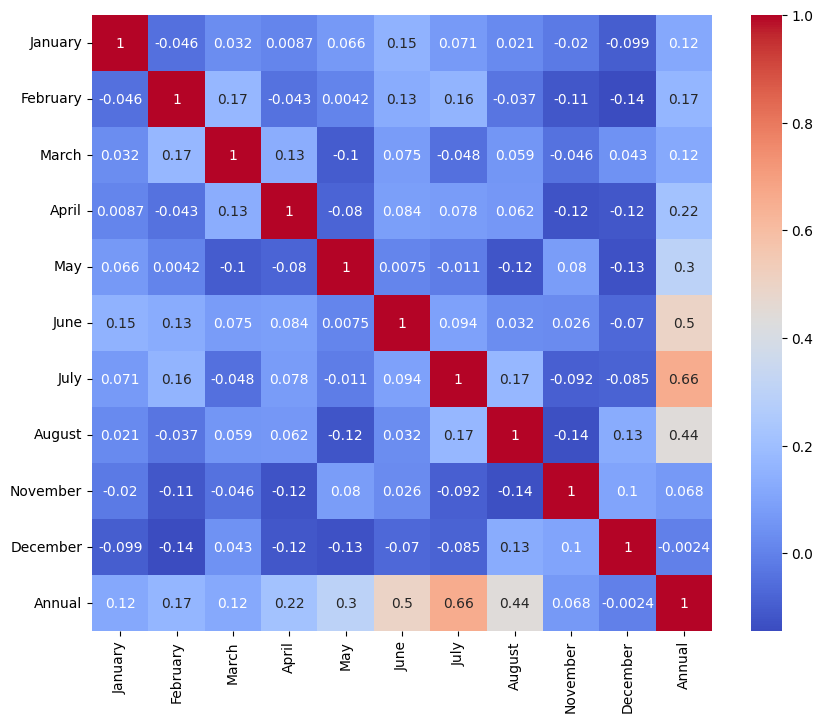

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[["January","February", "March", "April", "May", "June", "July", "August", "November", "December", "Annual"]].corr(), annot=True, cmap='coolwarm')

In [11]:
x = df.iloc[:,2:14]
x.head()

,January,February,March,April,May,June,July,August,September,October,November,December
0,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4
1,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5
2,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0
3,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3
4,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2


In [12]:
df.describe()

,Year,January,February,March,April,May,June,July,August,September,October,November,December,Annual,Flood
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,1962.306452,12.264516,17.700000,36.904032,115.056452,230.291129,650.337903,713.903226,432.819355,254.100806,289.133065,157.263710,38.791129,2947.974194,0.524194
std,35.628430,15.505610,29.194598,30.730863,54.281371,144.371057,193.874638,251.566415,182.394918,133.852135,94.300755,84.802367,36.353137,499.928342,0.501440
min,1901.000000,0.000000,0.000000,0.000000,13.100000,53.400000,196.800000,167.500000,178.600000,41.300000,68.500000,0.000000,0.000000,1533.000000,0.000000
25%,1931.750000,2.050000,4.550000,18.100000,75.250000,127.450000,533.625000,535.600000,318.575000,156.925000,217.750000,89.625000,10.000000,2618.975000,0.000000
50%,1962.500000,5.800000,8.350000,28.400000,111.900000,191.100000,625.600000,698.200000,391.950000,224.450000,281.200000,143.100000,30.850000,2940.300000,1.000000
75%,1993.250000,18.150000,22.375000,50.400000,139.050000,280.750000,790.000000,837.475000,503.200000,339.925000,353.500000,215.700000,53.200000,3241.775000,1.000000
max,2020.000000,83.500000,285.000000,217.200000,419.000000,738.800000,1098.200000,1526.500000,1398.900000,835.000000,567.900000,365.600000,202.300000,4473.000000,1.000000


In [13]:
y = df.iloc[:, -1]
y.head()

,Flood
0,1
1,1
2,1
3,1
4,0


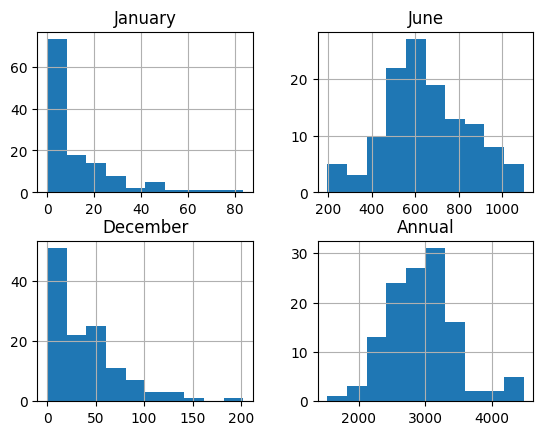

In [14]:
c = df[["January", "June", "December", "Annual"]]
c.hist()
plt.show()

In [15]:
#95% of data for train and 5% of data for testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,shuffle=True,random_state=9)

#Using KNN Classifier




In [16]:
# KNN Classifier
param_grid_knn = {'n_neighbors': [5, 10, 20, 30, 40, 50, 60, 70]}
grid_search_knn = GridSearchCV(neighbors.KNeighborsClassifier(), param_grid_knn, cv=5)
grid_search_knn.fit(x_train, y_train)
best_knn = grid_search_knn.best_estimator_



clf_knn = neighbors.KNeighborsClassifier(n_neighbors=20)
knn_c = clf_knn.fit(pd.DataFrame(x_train, columns=x.columns), y_train)


y_predict_knn = best_knn.predict(x_test)

initial_type = [('float_input', FloatTensorType([None, x_train.shape[1]]))]

# Convert the model to ONNX format
onnx_model = convert_sklearn(knn_c, 'knn_model.onnx', initial_types=initial_type)

with open('knn_model.onnx', 'wb') as f:
    f.write(onnx_model.SerializeToString())

accuracy_knn = accuracy_score(y_test, y_predict_knn)*100
precision_knn = precision_score(y_test, y_predict_knn)*100
recall_knn = recall_score(y_test, y_predict_knn)*100
f1_knn = f1_score(y_test, y_predict_knn)*100

print("\nKNN Metrics:")
print(f"Accuracy: {accuracy_knn:.2f}")
print(f"Precision: {precision_knn:.2f}")
print(f"Recall: {recall_knn:.2f}")
print(f"F1-score: {f1_knn:.2f}")


KNN Metrics:
Accuracy: 84.62
Precision: 83.33
Recall: 83.33
F1-score: 83.33


#Binary Logistic Regression


In [17]:
param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}
grid_search_lr = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid_lr, cv=5)
grid_search_lr.fit(x_train, y_train)
best_lr = grid_search_lr.best_estimator_

y_predict_lr = best_lr.predict(x_test)



lr = LogisticRegression(solver='liblinear', penalty='l2')
lr_c = lr.fit(x_train, y_train)
#y_predict_lr = lr_c.predict(x_test_std)


accuracy_lr = accuracy_score(y_test, y_predict_lr)*100
precision_lr = precision_score(y_test, y_predict_lr)*100
recall_lr = recall_score(y_test, y_predict_lr)*100
f1_lr = f1_score(y_test, y_predict_lr)*100

print("\nBinary Logistic Regression Metrics:")
print(f"Accuracy: {accuracy_lr:.2f}")
print(f"Precision: {precision_lr:.2f}")
print(f"Recall: {recall_lr:.2f}")
print(f"F1-score: {f1_lr:.2f}")


Binary Logistic Regression Metrics:
Accuracy: 100.00
Precision: 100.00
Recall: 100.00
F1-score: 100.00


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


#Decision tree classification


In [18]:
# Decision tree classification
param_grid_dt = {'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, 20, 30, 40, 50]}
grid_search_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5)
grid_search_dt.fit(x_train, y_train)
best_dt = grid_search_dt.best_estimator_

y_predict_dt = best_dt.predict(x_test)


#dtc_c = DecisionTreeClassifier()
#dtc_c.fit(x_train, y_train)
#y_predict_dt = dtc_c.predict(x_test)

accuracy_dt = accuracy_score(y_test, y_predict_dt)*100
precision_dt = precision_score(y_test, y_predict_dt)*100
recall_dt = recall_score(y_test, y_predict_dt)*100
f1_dt = f1_score(y_test, y_predict_dt)*100

print("\nDecision Tree Metrics:")
print(f"Accuracy: {accuracy_dt:.2f}")
print(f"Precision: {precision_dt:.2f}")
print(f"Recall: {recall_dt:.2f}")
print(f"F1-score: {f1_dt:.2f}")


Decision Tree Metrics:
Accuracy: 84.62
Precision: 100.00
Recall: 66.67
F1-score: 80.00


#Support Vectort Classifier

In [19]:
# Support Vector Classifier with reduced search space
param_grid_svc = {'C': [1, 10], 'kernel': ['linear', 'rbf']}
grid_search_svc = GridSearchCV(SVC(), param_grid_svc, cv=5)
grid_search_svc.fit(x_train, y_train)
best_svc = grid_search_svc.best_estimator_

y_predict_svc = best_svc.predict(x_test)

accuracy_svc = accuracy_score(y_test, y_predict_svc)*100
precision_svc = precision_score(y_test, y_predict_svc)*100
recall_svc = recall_score(y_test, y_predict_svc)*100
f1_svc = f1_score(y_test, y_predict_svc)*100

print("\nSupport Vector Classifier Metrics:")
print(f"Accuracy: {accuracy_svc:.2f}")
print(f"Precision: {precision_svc:.2f}")
print(f"Recall: {recall_svc:.2f}")
print(f"F1-score: {f1_svc:.2f}")



Support Vector Classifier Metrics:
Accuracy: 92.31
Precision: 85.71
Recall: 100.00
F1-score: 92.31


#Random Forest Classification


In [20]:
# Random Forest Classification
rmf = RandomForestClassifier(max_depth=3, random_state=0)
rmf_c = rmf.fit(x_train, y_train)
y_predict_rmf = rmf_c.predict(x_test)

print(x_train.shape)

accuracy_rmf = accuracy_score(y_test, y_predict_rmf)*100
precision_rmf = precision_score(y_test, y_predict_rmf)*100
recall_rmf = recall_score(y_test, y_predict_rmf)*100
f1_rmf = f1_score(y_test, y_predict_rmf)*100

print("\nRandom Forest Metrics:")
print(f"Accuracy: {accuracy_rmf:.2f}")
print(f"Precision: {precision_rmf:.2f}")
print(f"Recall: {recall_rmf:.2f}")
print(f"F1-score: {f1_rmf:.2f}")

#joblib.dump(rmf_c, 'random_forest_model.pkl')

initial_type = [('float_input', FloatTensorType([None, x_train.shape[1]]))]

# Convert the model to ONNX format
onnx_model = convert_sklearn(rmf_c, 'random_forest_model.onnx', initial_types=initial_type)

with open('random_forest_model.onnx', 'wb') as f:
    f.write(onnx_model.SerializeToString())

(111, 12)

Random Forest Metrics:
Accuracy: 100.00
Precision: 100.00
Recall: 100.00
F1-score: 100.00


Comparing all the prediction models


In [21]:
import plotly.graph_objects as go

# Classifier names
classifiers = ["KNN", "Logistic Regression", "Decision Tree", "Support Vector", "Random Forest"]

# Corresponding metric values
accuracy = [f"{accuracy_knn:.2f}", f"{accuracy_lr:.2f}", f"{accuracy_dt:.2f}", f"{accuracy_svc:.2f}", f"{accuracy_rmf:.2f}"]
precision = [f"{precision_knn:.2f}", f"{precision_lr:.2f}", f"{precision_dt:.2f}", f"{precision_svc:.2f}", f"{precision_rmf:.2f}"]
recall = [f"{recall_knn:.2f}", f"{recall_lr:.2f}", f"{recall_dt:.2f}", f"{recall_svc:.2f}", f"{recall_rmf:.2f}"]
f1 = [f"{f1_knn:.2f}", f"{f1_lr:.2f}", f"{f1_dt:.2f}", f"{f1_svc:.2f}", f"{f1_rmf:.2f}"]
# Create a table
fig = go.Figure(data=[go.Table(
    header=dict(values=['Classifiers', 'Accuracy', 'Precision', 'Recall', 'F1 Score']),
    cells=dict(values=[classifiers, accuracy, precision, recall, f1]))
])

# Customize the layout
fig.update_layout(title='Classifier Metrics Comparison',
                  height=400,
                  width=700)

# Interactive table
fig.show()

<ipython-input-22-360d25bcec55>:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




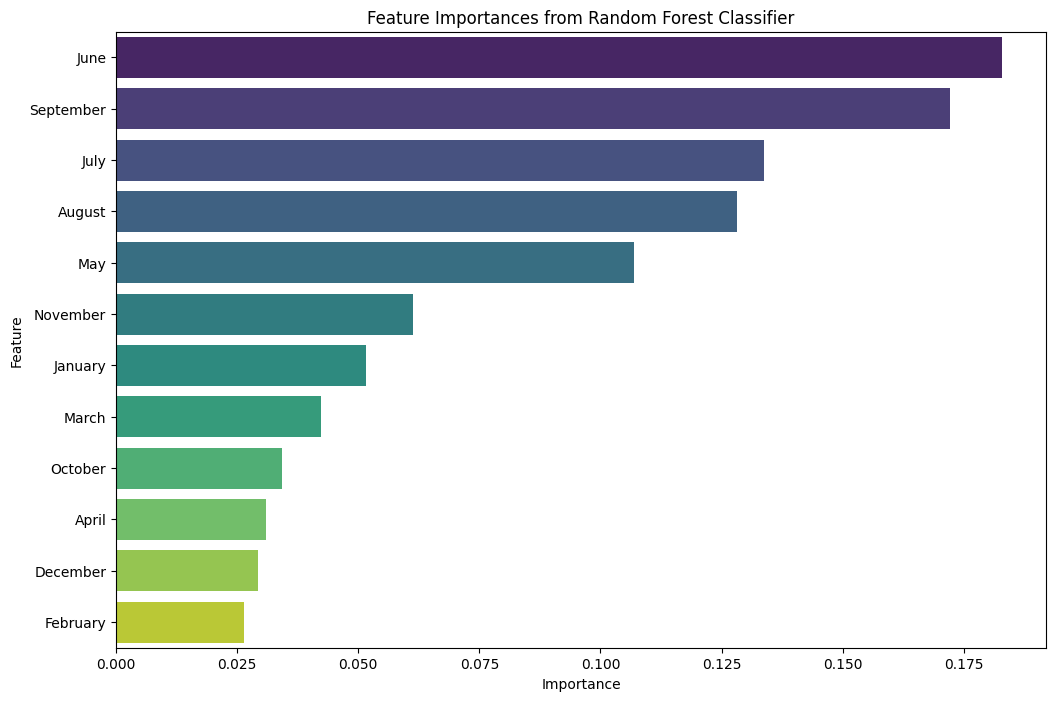

      Feature  Importance
5        June    0.182853
8   September    0.172222
6        July    0.133737
7      August    0.128240
4         May    0.106831
10   November    0.061381
0     January    0.051555
2       March    0.042264
9     October    0.034240
3       April    0.030909
11   December    0.029382
1    February    0.026387


In [22]:
# After training the Random Forest Classifier
rmf = RandomForestClassifier(max_depth=3, random_state=0)
rmf_c = rmf.fit(x_train, y_train)
y_predict_rmf = rmf_c.predict(x_test)

# Extract feature importances
feature_importances = rmf_c.feature_importances_

# Create a DataFrame for better visualization
features = x.columns
importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=importances_df['Importance'], y=importances_df['Feature'], palette='viridis')
plt.title('Feature Importances from Random Forest Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Print the sorted feature importances
print(importances_df)